In [1]:
import os
os.chdir(os.getcwd())

In [2]:
import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
orig_df = pd.read_csv("classroom.csv")
orig_df.head()

,midterm,final
0,87.727273,88.333333
1,81.363636,86.833333
2,77.954545,67.500000
3,72.272727,56.000000
4,53.863636,51.000000


In [4]:
orig_df.columns

Index(['midterm', 'final'], dtype='object')

In [5]:
x = orig_df['midterm']
y = orig_df['final']

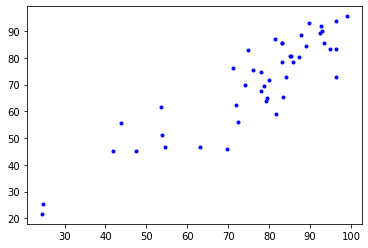

In [6]:
plt.plot(x,y,'b.',label='actual')

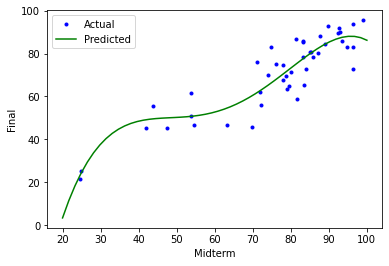

In [7]:
# Assumed the true model is polynomial with degree 4
d = 4
param = np.polyfit(x, y, d)
assumed_true_y = []
scores = np.linspace(20, 100) 
for s in scores:
    temp_assumed_true_y = 0
    for n in range(d,-1,-1):
        temp_assumed_true_y = temp_assumed_true_y + param[d-n]*math.pow(s,n)
    assumed_true_y.append(temp_assumed_true_y)

plt.plot(x,y,'b.',label='Actual')
plt.plot(scores,assumed_true_y,'g-', label='Predicted')
plt.xlabel('Midterm')
plt.ylabel('Final')
plt.legend()

In [8]:
mse = []
bias = []
var = []
mean_predicted_y_arr = []

for d in range(1,11):
    param = np.polyfit(x, y, d)
    predicted_y = []
    for i in range(len(x)):
        temp_predicted_y = 0
        for n in range(d,-1,-1):
            temp_predicted_y = temp_predicted_y + param[d-n]*math.pow(x[i],n)
        predicted_y.append(temp_predicted_y)
    error_sum = sum([(a - b)*(a - b) for a, b in zip(predicted_y, y)])
    mse.append(error_sum/len(x))

    mean_predicted_y = sum(predicted_y)/len(predicted_y)
    mean_predicted_y_arr.append(mean_predicted_y)
    bias_sum = []
    bias_sum = sum([(a - mean_predicted_y)*(a - mean_predicted_y) for a in assumed_true_y])
    bias.append(bias_sum/len(assumed_true_y))
    var_sum = []
    var_sum = sum([(a - mean_predicted_y)*(a - mean_predicted_y) for a in predicted_y])
    var.append(var_sum/len(predicted_y))
print(mse)
print(bias)
print(var)

[63.884550220120026, 63.489054568651945, 62.600593734242196, 55.886558479390665, 55.856248414433814, 55.58676300937063, 55.58674160636491, 55.16207365048062, 49.92317939619811, 46.52459684172439]
[599.6430571138885, 599.6430571138885, 599.6430571138873, 599.643057113881, 599.6430571138227, 599.6430571143921, 599.6430571139385, 599.643057140282, 599.6430563476728, 599.643051750318]
[246.23597101698041, 246.63146666844838, 247.5199275028566, 254.2339627577087, 254.26427282263504, 254.53375822787913, 254.5337796306374, 254.9584476262232, 260.1973418238854, 263.5959217184817]


Text(0, 0.5, 'MSE')

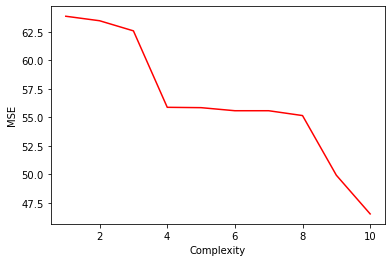

In [9]:
complexity_arr = np.linspace(1,10,10) 
plt.plot(complexity_arr,mse,'r')
plt.xlabel('Complexity')
plt.ylabel('MSE')

Text(0, 0.5, 'Bias')

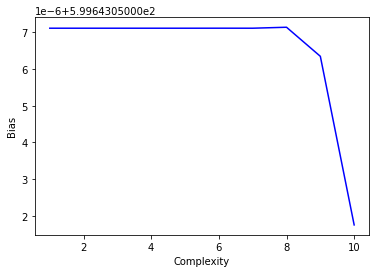

In [10]:
complexity_arr = np.linspace(1,10,10) 
plt.plot(complexity_arr,bias,'b')
plt.xlabel('Complexity')
plt.ylabel('Bias')

Text(0, 0.5, 'Bias')

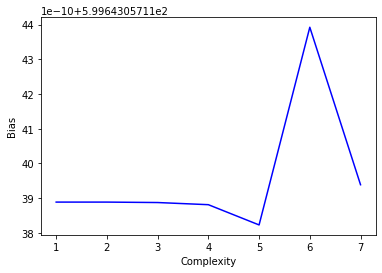

In [11]:
complexity_arr = np.linspace(1,10,10) 
plt.plot(complexity_arr[0:7],bias[0:7],'b')
plt.xlabel('Complexity')
plt.ylabel('Bias')

Text(0, 0.5, 'Var')

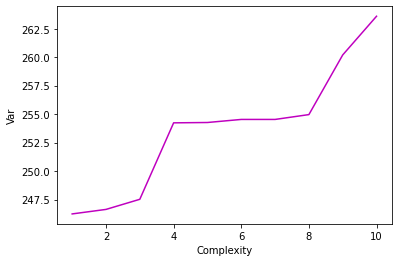

In [12]:
complexity_arr = np.linspace(1,10,10) 
plt.plot(complexity_arr,var,'m')
plt.xlabel('Complexity')
plt.ylabel('Var')

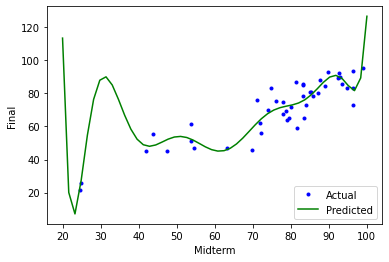

In [13]:
d = 10
param = np.polyfit(x, y, d)
predicted_y = []
scores = np.linspace(20, 100) 
for s in scores:
    temp_predicted_y = 0
    for n in range(d,-1,-1):
        temp_predicted_y = temp_predicted_y + param[d-n]*math.pow(s,n)
    predicted_y.append(temp_predicted_y)

plt.plot(x,y,'b.',label='Actual')
plt.plot(scores,predicted_y,'g-', label='Predicted')
plt.xlabel('Midterm')
plt.ylabel('Final')
plt.legend()

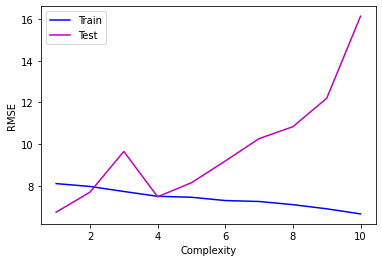

In [14]:
rmse_arr_train  = []
rmse_arr_test  = []
num_trains = 10
test_size_val = 0.1
for d in range(1,11):
    error_arr_train = []
    error_arr_test = []
    for i in range(num_trains):
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_size_val)  

        #Train the model
        param = np.polyfit(X_train, y_train, d)
        
        # Train Error
        predicted_y_train = []
        X_train_arr = list(X_train)
        for j in range(len(X_train_arr)):
            temp_predicted_y = 0
            for n in range(d,-1,-1):
                 temp_predicted_y = temp_predicted_y + param[d-n]*math.pow(X_train_arr[j],n)
            predicted_y_train.append(temp_predicted_y)

        # Test Error
        predicted_y_test = []
        X_test_arr = list(X_test)
        for j in range(len( X_test_arr)):
            temp_predicted_y = 0
            for n in range(d,-1,-1):
                temp_predicted_y = temp_predicted_y + param[d-n]*math.pow(X_test_arr[j],n)
            predicted_y_test.append(temp_predicted_y)

    
        error_arr_train.append(math.sqrt(metrics.mean_squared_error(predicted_y_train,y_train)))
        error_arr_test.append(math.sqrt(metrics.mean_squared_error(predicted_y_test,y_test)))

                
    rmse_arr_train.append(sum(error_arr_train)/len(error_arr_train))
    rmse_arr_test.append(sum(error_arr_test)/len(error_arr_test))

complexity_arr =  np.arange(1,11)
plt.plot(complexity_arr, rmse_arr_train, 'b', label='Train')
plt.plot(complexity_arr, rmse_arr_test, 'm', label='Test') 
plt.xlabel('Complexity')
plt.ylabel('RMSE')
plt.legend()